<a href="https://colab.research.google.com/github/DavidFodor20/ML_Projects/blob/main/Weather_Forecast.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Weather Forecast elemzés, idősoros adatok alapján

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
weather_data=pd.read_csv('https://raw.githubusercontent.com/dataquestio/project-walkthroughs/refs/heads/master/weather/local_weather.csv')

In [3]:
weather_data

,STATION,NAME,DATE,ACMH,ACSH,AWND,DAPR,FMTM,FRGT,MDPR,...,WT01,WT02,WT03,WT04,WT05,WT07,WT08,WT09,WT16,WT18
0,USW00023230,"OAKLAND INTERNATIONAL AIRPORT, CA US",1960-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,USW00023230,"OAKLAND INTERNATIONAL AIRPORT, CA US",1960-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN
2,USW00023230,"OAKLAND INTERNATIONAL AIRPORT, CA US",1960-01-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,USW00023230,"OAKLAND INTERNATIONAL AIRPORT, CA US",1960-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,USW00023230,"OAKLAND INTERNATIONAL AIRPORT, CA US",1960-01-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16854,USW00023230,"OAKLAND INTERNATIONAL AIRPORT, CA US",2022-01-24,NaN,NaN,4.47,NaN,NaN,NaN,NaN,...,1.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN
16855,USW00023230,"OAKLAND INTERNATIONAL AIRPORT, CA US",2022-01-25,NaN,NaN,4.70,NaN,NaN,NaN,NaN,...,1.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN
16856,USW00023230,"OAKLAND INTERNATIONAL AIRPORT, CA US",2022-01-26,NaN,NaN,2.68,NaN,NaN,NaN,NaN,...,1.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN
16857,USW00023230,"OAKLAND INTERNATIONAL AIRPORT, CA US",2022-01-27,NaN,NaN,3.13,NaN,NaN,NaN,NaN,...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
weather_data.fillna(0,inplace=True)
weather_data

,STATION,NAME,DATE,ACMH,ACSH,AWND,DAPR,FMTM,FRGT,MDPR,...,WT01,WT02,WT03,WT04,WT05,WT07,WT08,WT09,WT16,WT18
0,USW00023230,"OAKLAND INTERNATIONAL AIRPORT, CA US",1960-01-01,0.0,0.0,0.00,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,USW00023230,"OAKLAND INTERNATIONAL AIRPORT, CA US",1960-01-02,0.0,0.0,0.00,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,USW00023230,"OAKLAND INTERNATIONAL AIRPORT, CA US",1960-01-03,0.0,0.0,0.00,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,USW00023230,"OAKLAND INTERNATIONAL AIRPORT, CA US",1960-01-04,0.0,0.0,0.00,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,USW00023230,"OAKLAND INTERNATIONAL AIRPORT, CA US",1960-01-05,0.0,0.0,0.00,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16854,USW00023230,"OAKLAND INTERNATIONAL AIRPORT, CA US",2022-01-24,0.0,0.0,4.47,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
16855,USW00023230,"OAKLAND INTERNATIONAL AIRPORT, CA US",2022-01-25,0.0,0.0,4.70,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
16856,USW00023230,"OAKLAND INTERNATIONAL AIRPORT, CA US",2022-01-26,0.0,0.0,2.68,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
16857,USW00023230,"OAKLAND INTERNATIONAL AIRPORT, CA US",2022-01-27,0.0,0.0,3.13,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [11]:
weather_data = weather_data.set_index("DATE")
weather_data.loc["1960-01-01",:]

,1960-01-01
STATION,USW00023230
NAME,"OAKLAND INTERNATIONAL AIRPORT, CA US"
ACMH,0.0
ACSH,0.0
AWND,0.0
DAPR,0.0
FMTM,0.0
FRGT,0.0
MDPR,0.0
PGTM,0.0


In [13]:
weather_data.apply(pd.isnull).sum()


,0
STATION,0
NAME,0
ACMH,0
ACSH,0
AWND,0
DAPR,0
FMTM,0
FRGT,0
MDPR,0
PGTM,0


In [14]:
core_weather=weather_data[["PRCP","SNOW", "SNWD", "TMAX", "TMIN" ]].copy()

In [15]:
core_weather

,PRCP,SNOW,SNWD,TMAX,TMIN
DATE,,,,,
1960-01-01,0.0,0.0,0.0,49.0,30.0
1960-01-02,0.0,0.0,0.0,49.0,29.0
1960-01-03,0.0,0.0,0.0,54.0,35.0
1960-01-04,0.0,0.0,0.0,54.0,36.0
1960-01-05,0.0,0.0,0.0,55.0,33.0
...,...,...,...,...,...
2022-01-24,0.0,0.0,0.0,60.0,39.0
2022-01-25,0.0,0.0,0.0,57.0,43.0
2022-01-26,0.0,0.0,0.0,57.0,41.0


In [16]:
core_weather.apply(pd.isnull).sum()

,0
PRCP,0
SNOW,0
SNWD,0
TMAX,0
TMIN,0


In [17]:
del core_weather["SNOW"]

In [18]:
del core_weather["SNWD"]

In [19]:
core_weather["PRCP"].value_counts()

,count
PRCP,
0.00,13945
0.01,438
0.02,199
0.03,122
0.04,102
...,...
1.29,1
1.73,1
1.05,1


In [20]:
core_weather.loc["1983-10-20":"1983-11-05"]

,PRCP,TMAX,TMIN
DATE,,,
1983-10-20,0.00,73.0,52.0
1983-10-21,0.00,70.0,50.0
1983-10-22,0.00,70.0,50.0
1983-10-23,0.00,69.0,60.0
1983-10-24,0.00,73.0,58.0
1983-10-25,0.00,75.0,53.0
1983-10-26,0.00,79.0,53.0
1983-10-27,0.00,82.0,56.0
1983-10-28,0.00,74.0,56.0


In [21]:
core_weather

,PRCP,TMAX,TMIN
DATE,,,
1960-01-01,0.0,49.0,30.0
1960-01-02,0.0,49.0,29.0
1960-01-03,0.0,54.0,35.0
1960-01-04,0.0,54.0,36.0
1960-01-05,0.0,55.0,33.0
...,...,...,...
2022-01-24,0.0,60.0,39.0
2022-01-25,0.0,57.0,43.0
2022-01-26,0.0,57.0,41.0


In [22]:
core_weather=core_weather.fillna(method="ffill")

<ipython-input-22-4fbf6e72fb3a>:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  core_weather=core_weather.fillna(method="ffill")


In [23]:
core_weather.apply(pd.isnull).sum()/core_weather.shape[0]

,0
PRCP,0.0
TMAX,0.0
TMIN,0.0


In [24]:
core_weather.index=pd.to_datetime(core_weather.index)

In [25]:
core_weather.apply(lambda x: (x==9999).sum())

,0
PRCP,0
TMAX,0
TMIN,0


##Analyzing data

<Axes: xlabel='DATE'>

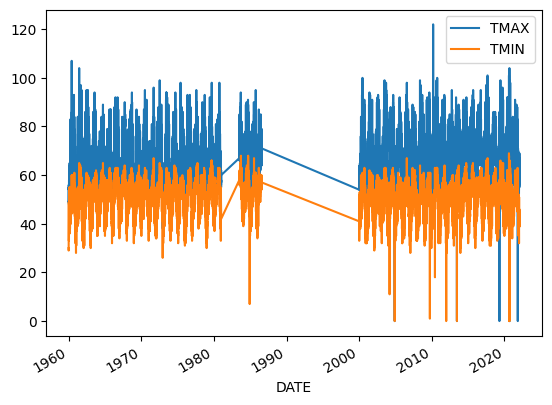

In [26]:
core_weather[["TMAX","TMIN"]].plot()

In [28]:
core_weather.index.year.value_counts().sort_index()

,count
DATE,
1960,366
1961,365
1962,365
1963,365
1964,366
1965,365
1966,365
1967,365
1968,366


<Axes: xlabel='DATE'>

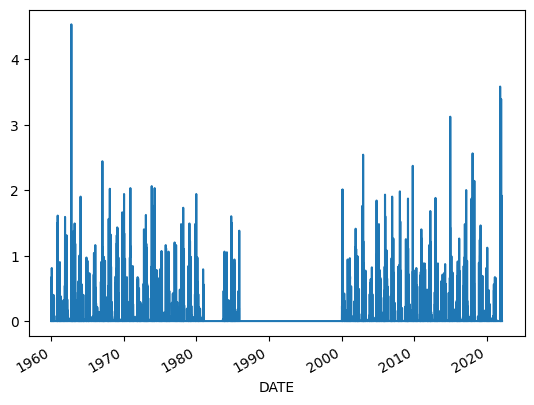

In [29]:
core_weather["PRCP"].plot()#kiemelkedokkel foglalkozni kéne, most ebben a esetben nem zavarnak engem

In [31]:
core_weather.groupby(core_weather.index.year).sum()["PRCP"]

,PRCP
DATE,
1960,14.01
1961,13.87
1962,22.47
1963,19.11
1964,16.83
1965,16.32
1966,13.11
1967,23.98
1968,17.19


##Modell elkészítése

következő napi max hőmérsékletet predictelem

In [32]:
core_weather["target"]=core_weather.shift(-1)["TMAX"]

In [33]:
core_weather #utolsó sorban van hiányos adat, így azt törlöm

,PRCP,TMAX,TMIN,target
DATE,,,,
1960-01-01,0.0,49.0,30.0,49.0
1960-01-02,0.0,49.0,29.0,54.0
1960-01-03,0.0,54.0,35.0,54.0
1960-01-04,0.0,54.0,36.0,55.0
1960-01-05,0.0,55.0,33.0,53.0
...,...,...,...,...
2022-01-24,0.0,60.0,39.0,57.0
2022-01-25,0.0,57.0,43.0,57.0
2022-01-26,0.0,57.0,41.0,67.0


In [36]:
core_weather=core_weather.iloc[:-1,:].copy()

In [37]:
core_weather

,PRCP,TMAX,TMIN,target
DATE,,,,
1960-01-01,0.0,49.0,30.0,49.0
1960-01-02,0.0,49.0,29.0,54.0
1960-01-03,0.0,54.0,35.0,54.0
1960-01-04,0.0,54.0,36.0,55.0
1960-01-05,0.0,55.0,33.0,53.0
...,...,...,...,...
2022-01-23,0.0,60.0,41.0,60.0
2022-01-24,0.0,60.0,39.0,57.0
2022-01-25,0.0,57.0,43.0,57.0


In [57]:
from sklearn.linear_model import Ridge #regressziós fajta, mely minimalizálja az overfittinget

In [58]:
reg=Ridge(alpha=.1)

In [59]:
predictors=["PRCP", "TMAX", "TMIN"]

In [60]:
train=core_weather.loc[:"2020-12-31"]
test=core_weather.loc["2021-01-01":]

In [66]:
reg.fit(train[predictors], train["target"])

Ridge(alpha=0.1)

In [67]:
predictions=reg.predict(test[predictors])

###Kiértékelés

In [68]:
from sklearn.metrics import mean_absolute_error

In [70]:
mean_absolute_error(test["target"],predictions) #általában hány értékkel tévedtem,

3.682296084415332

In [71]:
combined = pd.concat([test["target"], pd.Series(predictions, index=test.index)], axis=1) # Now 'predictions' is defined

In [72]:
combined

,target,0
DATE,,
2021-01-01,57.0,59.954136
2021-01-02,56.0,59.455673
2021-01-03,62.0,58.737055
2021-01-04,59.0,61.552497
2021-01-05,59.0,59.605738
...,...,...
2022-01-23,60.0,60.130644
2022-01-24,57.0,59.777628
2022-01-25,57.0,58.379420


In [75]:
combined.columns=["actual", "pred"]
combined

,actual,pred
DATE,,
2021-01-01,57.0,59.954136
2021-01-02,56.0,59.455673
2021-01-03,62.0,58.737055
2021-01-04,59.0,61.552497
2021-01-05,59.0,59.605738
...,...,...
2022-01-23,60.0,60.130644
2022-01-24,57.0,59.777628
2022-01-25,57.0,58.379420


<Axes: xlabel='DATE'>

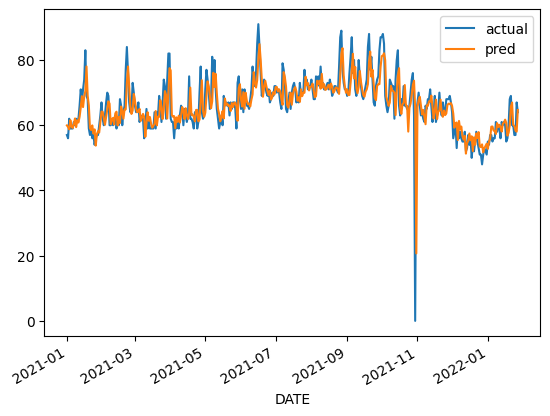

In [76]:
combined.plot()

In [80]:
reg.coef_

array([-2.39865329,  0.70141356,  0.17650815])

## **Folytatandó**